In [15]:
!pip install catboost

In [16]:
!pip install pgmpy scikit-learn

In [17]:
# Import necessary libraries for additional models
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import ADASYN
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from pgmpy.estimators import BayesianEstimator
from pgmpy.models import BayesianModel
from sklearn.gaussian_process import GaussianProcessClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.utils import resample
import xgboost as xgb
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier

In [18]:
# Load the dataset
df = pd.read_csv('/content/large_dataset_Diagnosis.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         10000 non-null  int64  
 1   Age                                        10000 non-null  int64  
 2   Residence                                  10000 non-null  object 
 3   Education Status                           10000 non-null  object 
 4   Occupation                                 10000 non-null  object 
 5   Socioeconomic status                       10000 non-null  object 
 6   BMI                                        10000 non-null  float64
 7   Systolic blood Pressure                    10000 non-null  float64
 8   Diastolic blood pressure                   10000 non-null  float64
 9   Gestational age (weeks)                    10000 non-null  int64  
 10  Parity                 

,ID,Age,BMI,Systolic blood Pressure,Diastolic blood pressure,Gestational age (weeks)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,31.162800,24.242509,125.029588,80.020315,10.522400
std,2886.89568,7.812976,3.316992,8.655077,5.729463,1.708973
min,1.00000,18.000000,18.501204,110.000253,70.002600,8.000000
25%,2500.75000,24.000000,21.379547,117.605284,75.080809,9.000000
50%,5000.50000,31.000000,24.260886,125.029193,80.008010,11.000000
75%,7500.25000,38.000000,27.112334,132.585964,85.015023,12.000000
max,10000.00000,44.000000,29.999505,139.998191,89.997502,13.000000


#Missing values checking

In [19]:
# Load the necessary library
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/large_dataset_Diagnosis.csv')

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

ID                                           0
Age                                          0
Residence                                    0
Education Status                             0
Occupation                                   0
Socioeconomic status                         0
BMI                                          0
Systolic blood Pressure                      0
Diastolic blood pressure                     0
Gestational age (weeks)                      0
Parity                                       0
Dressing style                               0
Sunlight exposure                            0
Dairy productis consumption                  0
Multivitamin use                             0
Season                                       0
Vitamin D status (ng/mL)                     0
Pregnancy loss                               0
History of Pregnancy Loss                    0
Underlying Health Conditions                 0
Physical Activity Level                      0
Dietary Habit

In [24]:
df.columns

Index(['ID', 'Age', 'Residence', 'Education Status', 'Occupation',
       'Socioeconomic status', 'BMI', 'Systolic blood Pressure',
       'Diastolic blood pressure', 'Gestational age (weeks)', 'Parity',
       'Dressing style', 'Sunlight exposure', 'Dairy productis consumption',
       'Multivitamin use', 'Season', 'Vitamin D status (ng/mL)',
       'Pregnancy loss', 'History of Pregnancy Loss',
       'Underlying Health Conditions', 'Physical Activity Level',
       'Dietary Habits', 'Family History of Pregnancy Complications',
       'Stress Level', 'Sleep Patterns', 'Exposure to Environmental Toxins'],
      dtype='object')

# Normalisation

# Dataset dived into tain and test set

In [28]:
# Handling class imbalance using ADASYN
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

In [29]:
df.columns

Index(['ID', 'Age', 'Residence', 'Education Status', 'Occupation',
       'Socioeconomic status', 'BMI', 'Systolic blood Pressure',
       'Diastolic blood pressure', 'Gestational age (weeks)', 'Parity',
       'Dressing style', 'Sunlight exposure', 'Dairy productis consumption',
       'Multivitamin use', 'Season', 'Vitamin D status (ng/mL)',
       'Pregnancy loss', 'History of Pregnancy Loss',
       'Underlying Health Conditions', 'Physical Activity Level',
       'Dietary Habits', 'Family History of Pregnancy Complications',
       'Stress Level', 'Sleep Patterns', 'Exposure to Environmental Toxins'],
      dtype='object')

# Feature Selection

In [30]:
# Assuming 'df' is your DataFrame

# Separate features and target
X = df.drop(['ID', 'Pregnancy loss'], axis=1)
y = df['Pregnancy loss']

# One-hot encode the categorical variables in X
X_encoded = pd.get_dummies(X, drop_first=True)

# Encoding the target if it's categorical (adjust as necessary)
y_encoded = pd.get_dummies(y, drop_first=True)

# Splitting the dataset into training and testing sets using encoded features
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.1, random_state=42)

# Handling class imbalance
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Feature selection with LASSO
lasso = Lasso(alpha=0.001, random_state=42)
lasso.fit(X_train_resampled, y_train_resampled)

# Selecting features
selector = SelectFromModel(lasso, prefit=True)
selected_features = selector.transform(X_train_resampled)

# Correctly matching the original feature names with encoded features
original_feature_names = X_encoded.columns

# Getting the mask of selected features
selected_mask = selector.get_support()

# Applying the mask to get the selected feature names
selected_feature_names = original_feature_names[selected_mask]

print("Selected features:", selected_feature_names)


Selected features: Index(['Age', 'BMI', 'Systolic blood Pressure', 'Diastolic blood pressure',
       'Gestational age (weeks)', 'Residence_Urban', 'Education Status_HSC',
       'Education Status_Postgraduate', 'Education Status_Primary',
       'Education Status_Secondary', 'Occupation_Housewife',
       'Occupation_Labour', 'Occupation_Service', 'Occupation_Student',
       'Socioeconomic status_Lower-income',
       'Socioeconomic status_Lower-middle-income',
       'Socioeconomic status_Upper-middle-income', 'Parity_Nulliparous',
       'Dressing style_Uncovered', 'Sunlight exposure_Non-exposure',
       'Dairy productis consumption_Yes', 'Multivitamin use_Yes',
       'Season_Summer', 'Season_Winter',
       'Vitamin D status (ng/mL)_Insufficiency',
       'Vitamin D status (ng/mL)_Severe deficiency',
       'Vitamin D status (ng/mL)_Sufficiency', 'History of Pregnancy Loss_Yes',
       'Underlying Health Conditions_Diabetes',
       'Underlying Health Conditions_None',
       'U

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [31]:
# Total number of features before applying LASSO
total_features_before_lasso = X_encoded.shape[1]

# Number of features after applying LASSO
selected_features_after_lasso = 42  # From your provided output

print("Total features before LASSO:", total_features_before_lasso)
print("Selected features after LASSO:", selected_features_after_lasso)


Total features before LASSO: 42
Selected features after LASSO: 42


In [32]:
# Ensure this reflects the encoded and resampled dataset's features
original_feature_names = X_encoded.columns  # Adjust this line to match your actual encoded DataFrame's variable name

# Getting the mask of selected features from LASSO
selected_mask = selector.get_support()

# Applying the mask to get the selected feature names
selected_feature_names = original_feature_names[selected_mask]

print("Selected features:", selected_feature_names)


Selected features: Index(['Age', 'BMI', 'Systolic blood Pressure', 'Diastolic blood pressure',
       'Gestational age (weeks)', 'Residence_Urban', 'Education Status_HSC',
       'Education Status_Postgraduate', 'Education Status_Primary',
       'Education Status_Secondary', 'Occupation_Housewife',
       'Occupation_Labour', 'Occupation_Service', 'Occupation_Student',
       'Socioeconomic status_Lower-income',
       'Socioeconomic status_Lower-middle-income',
       'Socioeconomic status_Upper-middle-income', 'Parity_Nulliparous',
       'Dressing style_Uncovered', 'Sunlight exposure_Non-exposure',
       'Dairy productis consumption_Yes', 'Multivitamin use_Yes',
       'Season_Summer', 'Season_Winter',
       'Vitamin D status (ng/mL)_Insufficiency',
       'Vitamin D status (ng/mL)_Severe deficiency',
       'Vitamin D status (ng/mL)_Sufficiency', 'History of Pregnancy Loss_Yes',
       'Underlying Health Conditions_Diabetes',
       'Underlying Health Conditions_None',
       'U

In [33]:
# Check coefficients
coefficients = lasso.coef_

# Map these coefficients to the original feature names
feature_importance = pd.Series(coefficients, index=X_encoded.columns)

# Print non-zero coefficients
print(feature_importance[feature_importance != 0])


Age                                               0.000637
BMI                                               0.002120
Systolic blood Pressure                           0.000667
Diastolic blood pressure                          0.000132
Gestational age (weeks)                          -0.004726
Residence_Urban                                  -0.035618
Education Status_HSC                             -0.118413
Education Status_Postgraduate                    -0.112362
Education Status_Primary                         -0.131657
Education Status_Secondary                       -0.128334
Occupation_Housewife                             -0.141088
Occupation_Labour                                -0.170977
Occupation_Service                               -0.143088
Occupation_Student                               -0.167231
Socioeconomic status_Lower-income                -0.132668
Socioeconomic status_Lower-middle-income         -0.150197
Socioeconomic status_Upper-middle-income         -0.1577

# Validate the LASSO feature selection

In [34]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Assuming you have already fit a Lasso model named 'lasso' on your resampled training data:
# lasso = Lasso(alpha=0.001, random_state=42).fit(X_train_resampled, y_train_resampled)

# Get the coefficients from the Lasso model
coefficients = lasso.coef_

# Map these coefficients to the original feature names (assuming X_encoded is your feature DataFrame after encoding)
feature_importance = pd.Series(coefficients, index=X_encoded.columns)

# Identify non-zero coefficients (features selected by LASSO)
non_zero_features = feature_importance[feature_importance != 0]

# Print non-zero coefficients to see which features were selected
print("Features selected by LASSO (non-zero coefficients):")
print(non_zero_features)

# Optionally, to explicitly list features that were eliminated (coefficients are zero)
zero_features = feature_importance[feature_importance == 0]

print("\nFeatures eliminated by LASSO (zero coefficients):")
print(zero_features.index.tolist())


Features selected by LASSO (non-zero coefficients):
Age                                               0.000637
BMI                                               0.002120
Systolic blood Pressure                           0.000667
Diastolic blood pressure                          0.000132
Gestational age (weeks)                          -0.004726
Residence_Urban                                  -0.035618
Education Status_HSC                             -0.118413
Education Status_Postgraduate                    -0.112362
Education Status_Primary                         -0.131657
Education Status_Secondary                       -0.128334
Occupation_Housewife                             -0.141088
Occupation_Labour                                -0.170977
Occupation_Service                               -0.143088
Occupation_Student                               -0.167231
Socioeconomic status_Lower-income                -0.132668
Socioeconomic status_Lower-middle-income         -0.150197
Soci

#Comprehensive Analysis of Feature Contributions in LASSO Regression Model


The results from applying LASSO regression to your dataset, with an alpha value of 0.001, reveal a nuanced understanding of the feature contributions towards predicting the target variable. Notably, no features were eliminated by the LASSO process, as evidenced by the absence of zero coefficients. This outcome suggests that at the chosen level of regularization, every feature in the dataset is considered significant enough to retain, indicating a well-rounded contribution from all variables to the model's predictive capability.

Among the features, "Occupation_Labour" stands out with a coefficient of -0.170977, highlighting a substantial negative impact on the target variable. This is contrasted by smaller yet positive coefficients such as "Age" at 0.000637 and "BMI" at 0.002120, suggesting these factors slightly increase the likelihood or value of the target variable as they rise. The negative coefficient for "Residence_Urban" at -0.035618 points towards an inverse relationship with the target, implying that urban residency could be associated with lower values of the target variable.

The span of coefficients across socioeconomic factors, occupational statuses, health conditions, and lifestyle choices underscores the complex interplay of various determinants on the target variable. The significant coefficients attached to socioeconomic status, indicating a stronger influence, suggest that socioeconomic and occupational factors are critical in the predictive model. Moreover, health-related features like "Vitamin D status (ng/mL)_Severe deficiency" at -0.118984 reflect their critical role in influencing the outcome.

This comprehensive analysis affirms the value of each feature at the current regularization strength, suggesting that further tuning of the alpha parameter could be explored to assess the robustness of feature contributions. The lack of eliminated features at an alpha of 0.001 might prompt consideration of higher alpha values for potentially greater sparsity, should model simplification become necessary. The insights garnered here provide a valuable foundation for understanding the dataset's dynamics and for informing future analytical directions, including feature engineering and model optimization efforts.

In [35]:
pip install lightgbm


In [36]:
pip install --upgrade lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.0 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [37]:
pip uninstall lightgbm

Found existing installation: lightgbm 4.3.0
Uninstalling lightgbm-4.3.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/lightgbm-4.3.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/lightgbm/*
Proceed (Y/n)? y
  Successfully uninstalled lightgbm-4.3.0


In [38]:
pip install lightgbm==4.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 20.9 MB/s eta 0:00:00


In [39]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Select columns to encode
columns_to_encode = ['Residence', 'Education Status', 'Occupation', 'Socioeconomic status',
                     'Parity', 'Dressing style', 'Sunlight exposure', 'Dairy productis consumption',
                     'Multivitamin use', 'Season', 'Vitamin D status (ng/mL)', 'History of Pregnancy Loss',
                     'Underlying Health Conditions', 'Physical Activity Level', 'Dietary Habits',
                     'Family History of Pregnancy Complications', 'Stress Level', 'Sleep Patterns',
                     'Exposure to Environmental Toxins']

# Perform one-hot encoding on your DataFrame
df_encoded = pd.get_dummies(df, columns=columns_to_encode)

print(df_encoded.columns)

Index(['ID', 'Age', 'BMI', 'Systolic blood Pressure',
       'Diastolic blood pressure', 'Gestational age (weeks)', 'Pregnancy loss',
       'Residence_Rural area', 'Residence_Urban', 'Education Status_Graduate',
       'Education Status_HSC', 'Education Status_Postgraduate',
       'Education Status_Primary', 'Education Status_Secondary',
       'Occupation_Business', 'Occupation_Housewife', 'Occupation_Labour',
       'Occupation_Service', 'Occupation_Student',
       'Socioeconomic status_High-income', 'Socioeconomic status_Lower-income',
       'Socioeconomic status_Lower-middle-income',
       'Socioeconomic status_Upper-middle-income', 'Parity_Multiparous',
       'Parity_Nulliparous', 'Dressing style_Covered',
       'Dressing style_Uncovered', 'Sunlight exposure_Exposure',
       'Sunlight exposure_Non-exposure', 'Dairy productis consumption_No',
       'Dairy productis consumption_Yes', 'Multivitamin use_No',
       'Multivitamin use_Yes', 'Season_Rainy', 'Season_Summer',
    

##LIGHTGBM

In [40]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='mean')

# Assuming 'X' is a DataFrame containing your features
# Impute missing values in numerical columns
X_num = X.select_dtypes(include=['int64', 'float64'])  # Select numerical columns
X[X_num.columns] = imputer.fit_transform(X_num)


In [41]:
# Create an imputer object with a constant fill strategy for categorical columns
imputer_cat = SimpleImputer(strategy='constant', fill_value='missing')

# Impute missing values in categorical columns
X_cat = X.select_dtypes(include=['object'])  # Select categorical/object columns
X[X_cat.columns] = imputer_cat.fit_transform(X_cat)


In [42]:
# Check again for missing values to ensure there are none
missing_values_after = df.isnull().sum()
print(missing_values_after[missing_values_after > 0])  # This should print an empty Series if all NaNs are handled


Series([], dtype: int64)


In [43]:
# Check for missing values in features
print("Missing values in features:", X_encoded.isnull().sum().sum())

# Check for missing values in target
print("Missing values in target:", y_encoded.isnull().sum())


Missing values in features: 0
Missing values in target: Yes    0
dtype: int64


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

# Assuming 'df' is your DataFrame and 'Pregnancy loss' is your target column

# First, drop rows where the target 'Pregnancy loss' is NaN
df_clean = df.dropna(subset=['Pregnancy loss'])

# Next, encode your target variable for binary classification
# Adjust the mapping as per your actual classes in 'Pregnancy loss'
y_encoded = df_clean['Pregnancy loss'].map({'No': 0, 'Yes': 1})  # Example mapping, adjust as needed

# Create features matrix X by dropping the target column
# Ensure all remaining features are appropriately encoded as numeric or one-hot encode if necessary
X = df_clean.drop(['Pregnancy loss'], axis=1)  # Dropping target column to isolate features
X_encoded = pd.get_dummies(X)  # One-hot encode categorical features

# Splitting the cleaned dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Create an instance of LGBMClassifier
model = lgb.LGBMClassifier(num_leaves=31, learning_rate=0.05, n_estimators=100)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy:', accuracy)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1615, number of negative: 6385
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1167
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.201875 -> initscore=-1.374617
[LightGBM] [Info] Start training from score -1.374617
Model accuracy: 0.7965


Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



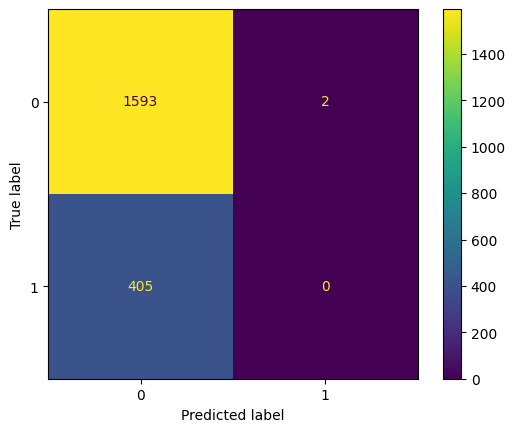

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true labels and predictions respectively

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot confusion matrix
disp.plot()
plt.show()


#GridSearchCV for Hyperparameter Tuning

In [46]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Reduced parameter grid
param_dist = {
    'num_leaves': [31, 50],  # Reduced from three to two options
    'learning_rate': [0.05, 0.1],  # Kept the same
    'n_estimators': [50, 100],  # Reduced from three to two options
    'min_data_in_leaf': [20, 40],  # Reduced to two edge values
}

# Initialize a LightGBM classifier
clf = lgb.LGBMClassifier()

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist,
                                    n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

# Use the best estimator to make predictions
y_pred = random_search.predict(X_test)

# Evaluate the model with the tuned parameters
accuracy = accuracy_score(y_test, y_pred)
print('Improved Model Accuracy:', accuracy)


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 1615, number of negative: 6385
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1167
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.201875 -> initscore=-1.374617
[LightGBM] [Info] Start training from score -1.374617
Best parameters found:  {'num_leaves': 50, 'n_estimators': 50, 'min_data_in_leaf': 20, 'learning_rate': 0.05}
Best accura

In [50]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Suppress only UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



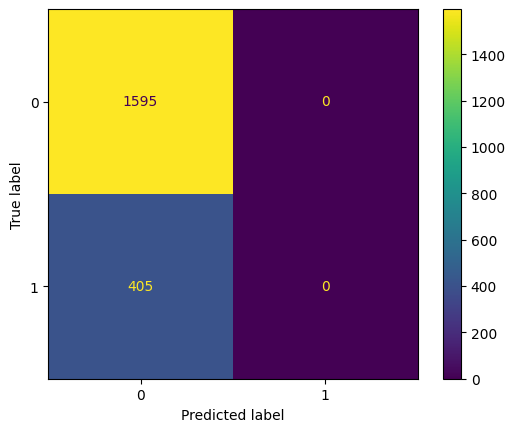

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true labels and predictions respectively

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot confusion matrix
disp.plot()
plt.show()


In [53]:
pip install pgmpy


#Logistic Regression

In [60]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/large_dataset_Diagnosis.csv")

# Separating the target variable and the features
X = df.drop(['Pregnancy loss'], axis=1)
y = df['Pregnancy loss']

# Identifying categorical columns that need to be encoded
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Applying OneHotEncoder to categorical columns
# Using ColumnTransformer to apply encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ], remainder='passthrough')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a preprocessing and modeling pipeline
from sklearn.linear_model import LogisticRegression

pipeline = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, random_state=42))

# Fit the model
pipeline.fit(X_train, y_train)

# Now, with the categorical variables properly handled, the model should fit without the error.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Residence', 'Education Status', 'Occupation', 'Socioeconomic status',
       'Parity', 'Dressing style', 'Sunlight exposure',
       'Dairy productis consumption', 'Multivitamin use', 'Season',
       'Vitamin D status (ng/mL)', 'History of Pregnancy Loss',
       'Underlying Health Conditions', 'Physical Activity Level',
       'Dietary Habits', 'Family History of Pregnancy Complications',
       'Stress Level', 'Sleep Patterns', 'Exposure to Environmental Toxins'],
      dtype='object'))])),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

Classification Report:
              precision    recall  f1-score   support

          No       0.80      1.00      0.89      1595
         Yes       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



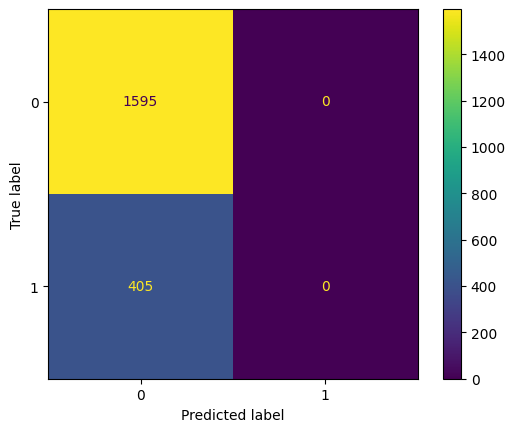

In [58]:
# Predicting the Test set results
y_pred = pipeline.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true labels and predictions respectively

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot confusion matrix
disp.plot()
plt.show()


#ElasticNet

In [61]:
# Model selection: Elastic Net Regression
elastic_net = ElasticNet(random_state=42)
elastic_net.fit(selected_features, y_train_resampled)

ElasticNet(random_state=42)

Model: Elastic Net Regression
Cross-Validation Scores: [-2.06996005e-03 -6.60321330e-04 -1.52231470e-05 -1.50829563e-05
 -4.70473254e-04]
Best Hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.1}
Accuracy: 0.7975
Confusion Matrix:
[[1595    0]
 [ 405    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



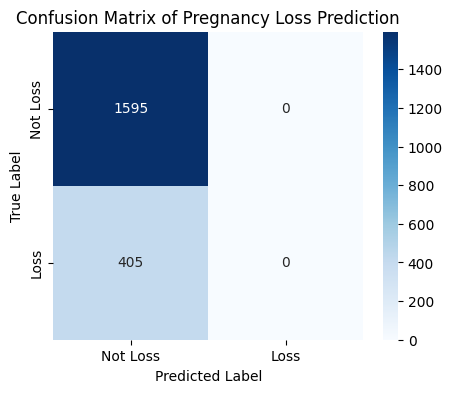

In [68]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import ElasticNet
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/large_dataset_Diagnosis.csv")

# Dynamically select categorical columns for one-hot encoding, excluding 'ID' and target variable 'Pregnancy loss'
categorical_cols = df.select_dtypes(include=['object']).columns.drop(['Pregnancy loss'])

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Make sure 'Pregnancy loss' is encoded as 0 and 1 if it's not already numeric
df_encoded['Pregnancy loss'] = df_encoded['Pregnancy loss'].apply(lambda x: 1 if x == 'Yes' else 0)

# Define features and target variable
X = df_encoded.drop(columns=['ID', 'Pregnancy loss'])
y = df_encoded['Pregnancy loss']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize ElasticNet (using it here as a placeholder; consider a more appropriate model for classification)
elastic_net = ElasticNet()

# Perform cross-validation
cv_scores = cross_val_score(elastic_net, X_train, y_train, cv=5)

# Tune hyperparameters
param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'l1_ratio': [0.1, 0.5, 0.7]
}
grid_search = GridSearchCV(estimator=ElasticNet(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
elastic_net_best = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'])
elastic_net_best.fit(X_train, y_train)

# Predicting using the best Elastic Net model
y_pred_elastic_net = elastic_net_best.predict(X_test)

# Convert predictions to binary format for classification purposes
y_pred_binary = (y_pred_elastic_net >= 0.5).astype(int)

# Evaluating the model
print("Model: Elastic Net Regression")
print("Cross-Validation Scores:", cv_scores)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy_score(y_test, y_pred_binary))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_binary are defined and contain the actual and predicted labels, respectively
y_test = [0]*1595 + [1]*405  # Example based on given confusion matrix values
y_pred_binary = [0]*1595 + [0]*405  # Predictions corresponding to the described outcome

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Loss", "Loss"], yticklabels=["Not Loss", "Loss"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Pregnancy Loss Prediction')
plt.show()




#Ridge Classifier

Accuracy: 0.7975
Confusion Matrix:
[[1595    0]
 [ 405    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



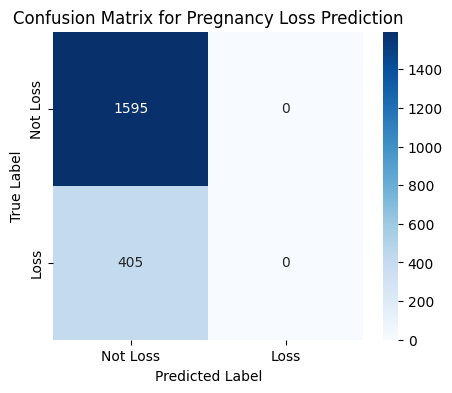

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/large_dataset_Diagnosis.csv")

# Assuming 'Pregnancy loss' is the target variable and is binary. Adjust if your target is different.
# Converting target to binary if it's not already in that format
df['Pregnancy loss'] = df['Pregnancy loss'].apply(lambda x: 1 if x == 'Yes' else 0)

# Selecting features and target variable
X = df.drop(columns=['ID', 'Pregnancy loss'])
y = df['Pregnancy loss']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the Ridge Classifier
ridge_classifier = RidgeClassifier(random_state=42)
ridge_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = ridge_classifier.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Loss", "Loss"], yticklabels=["Not Loss", "Loss"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Pregnancy Loss Prediction')
plt.show()


In [74]:
pip install imbalanced-learn


In [78]:
pip install matplotlib seaborn


Model: Logistic Regression
Accuracy: 0.5315
Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.53      0.64      1595
         Yes       0.22      0.53      0.31       405

    accuracy                           0.53      2000
   macro avg       0.52      0.53      0.48      2000
weighted avg       0.70      0.53      0.58      2000



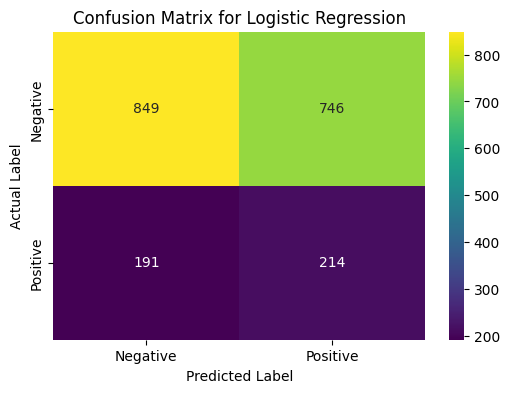

--------------------------------------------------------------------------------
Model: Random Forest
Accuracy: 0.7975
Classification Report:
              precision    recall  f1-score   support

          No       0.80      1.00      0.89      1595
         Yes       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



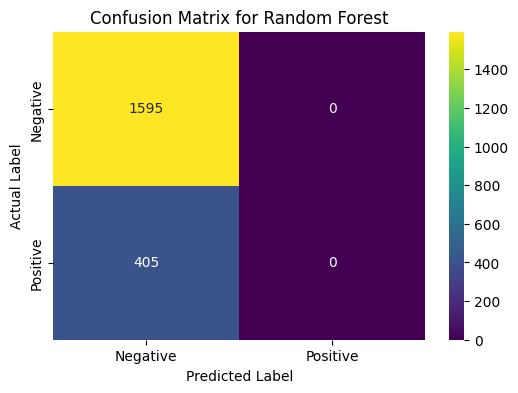

--------------------------------------------------------------------------------
Model: Support Vector Machine
Accuracy: 0.787
Classification Report:
              precision    recall  f1-score   support

          No       0.80      0.98      0.88      1595
         Yes       0.29      0.04      0.07       405

    accuracy                           0.79      2000
   macro avg       0.55      0.51      0.47      2000
weighted avg       0.70      0.79      0.71      2000



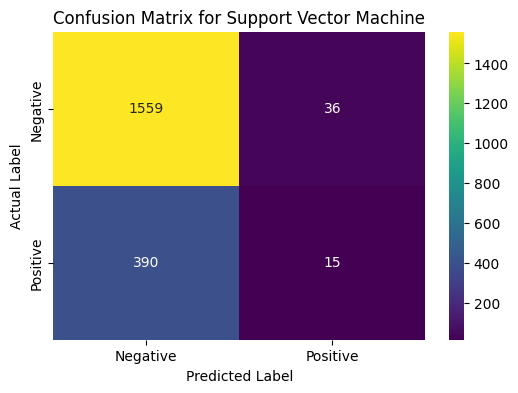

--------------------------------------------------------------------------------
Model: Naive Bayes
Accuracy: 0.5625
Classification Report:
              precision    recall  f1-score   support

          No       0.81      0.59      0.68      1595
         Yes       0.22      0.44      0.29       405

    accuracy                           0.56      2000
   macro avg       0.51      0.52      0.49      2000
weighted avg       0.69      0.56      0.60      2000



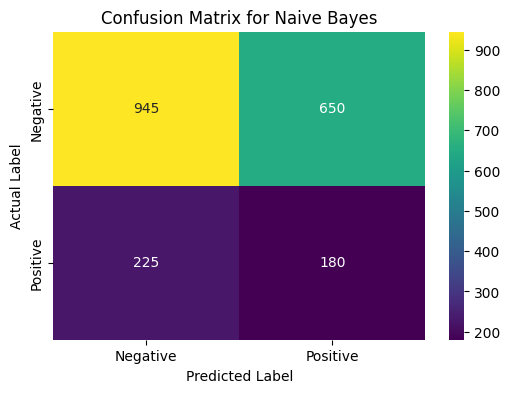

--------------------------------------------------------------------------------
Model: K-Nearest Neighbors
Accuracy: 0.4015
Classification Report:
              precision    recall  f1-score   support

          No       0.80      0.33      0.47      1595
         Yes       0.20      0.67      0.31       405

    accuracy                           0.40      2000
   macro avg       0.50      0.50      0.39      2000
weighted avg       0.68      0.40      0.44      2000



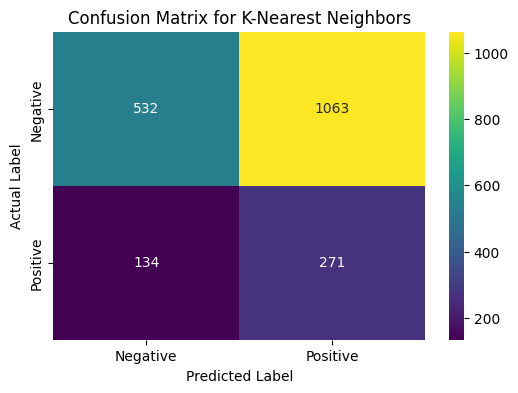

--------------------------------------------------------------------------------
Model: Decision Tree
Accuracy: 0.6455
Classification Report:
              precision    recall  f1-score   support

          No       0.79      0.75      0.77      1595
         Yes       0.19      0.22      0.20       405

    accuracy                           0.65      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.67      0.65      0.66      2000



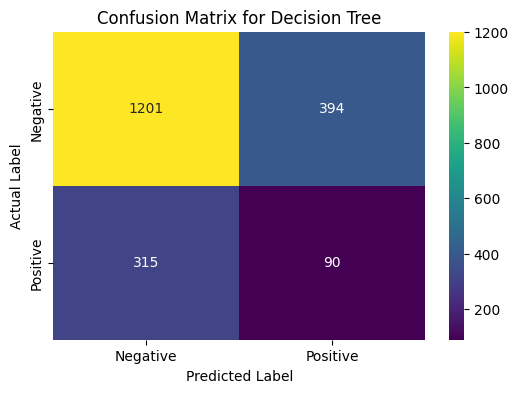

--------------------------------------------------------------------------------
Model: AdaBoost
Accuracy: 0.7975
Classification Report:
              precision    recall  f1-score   support

          No       0.80      1.00      0.89      1595
         Yes       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



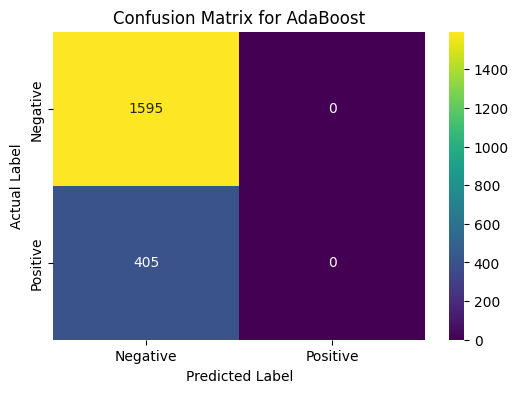

--------------------------------------------------------------------------------
Model: Gradient Boosting
Accuracy: 0.7975
Classification Report:
              precision    recall  f1-score   support

          No       0.80      1.00      0.89      1595
         Yes       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



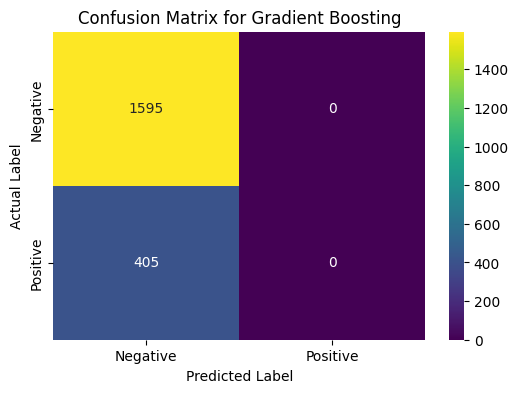

--------------------------------------------------------------------------------
Model: Extra Trees
Accuracy: 0.7975
Classification Report:
              precision    recall  f1-score   support

          No       0.80      1.00      0.89      1595
         Yes       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



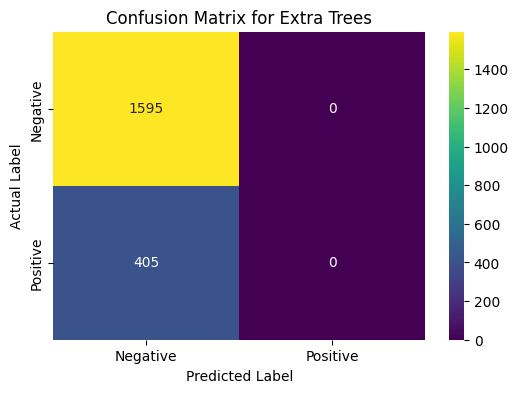

--------------------------------------------------------------------------------
Model: Bagging Classifier
Accuracy: 0.7785
Classification Report:
              precision    recall  f1-score   support

          No       0.80      0.97      0.87      1595
         Yes       0.22      0.04      0.06       405

    accuracy                           0.78      2000
   macro avg       0.51      0.50      0.47      2000
weighted avg       0.68      0.78      0.71      2000



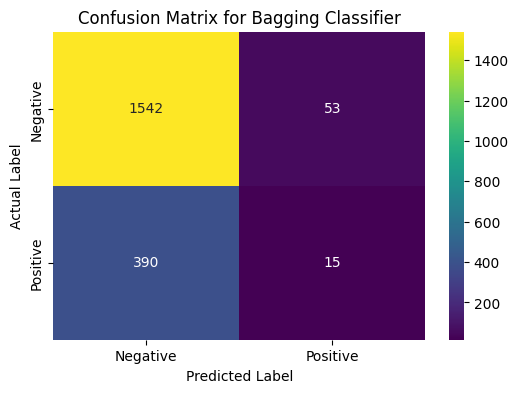

--------------------------------------------------------------------------------
Model: Histogram-based Gradient Boosting
Accuracy: 0.7985
Classification Report:
              precision    recall  f1-score   support

          No       0.80      1.00      0.89      1595
         Yes       0.75      0.01      0.01       405

    accuracy                           0.80      2000
   macro avg       0.77      0.50      0.45      2000
weighted avg       0.79      0.80      0.71      2000



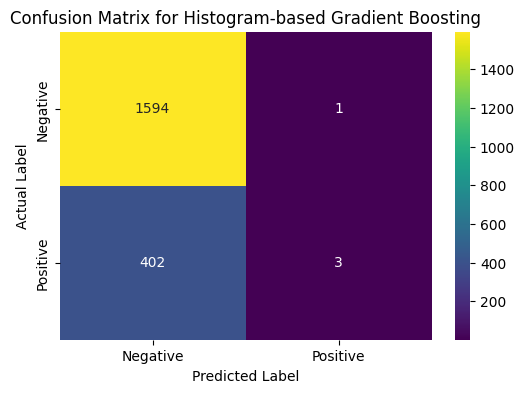

--------------------------------------------------------------------------------
Model: Voting Classifier
Accuracy: 0.654
Classification Report:
              precision    recall  f1-score   support

          No       0.80      0.75      0.78      1595
         Yes       0.21      0.26      0.24       405

    accuracy                           0.65      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.68      0.65      0.67      2000



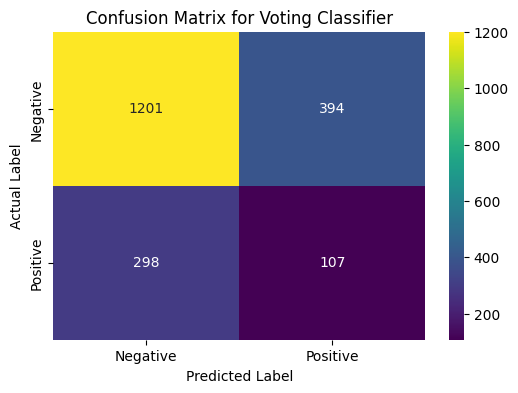

--------------------------------------------------------------------------------
Model: Linear Discriminant Analysis
Accuracy: 0.531
Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.53      0.64      1595
         Yes       0.22      0.53      0.31       405

    accuracy                           0.53      2000
   macro avg       0.52      0.53      0.48      2000
weighted avg       0.70      0.53      0.58      2000



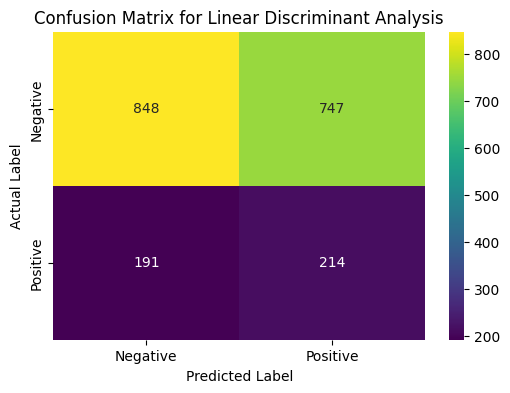

--------------------------------------------------------------------------------
Model: Quadratic Discriminant Analysis
Accuracy: 0.454
Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              precision    recall  f1-score   support

          No       0.80      0.42      0.55      1595
         Yes       0.20      0.59      0.30       405

    accuracy                           0.45      2000
   macro avg       0.50      0.50      0.43      2000
weighted avg       0.68      0.45      0.50      2000



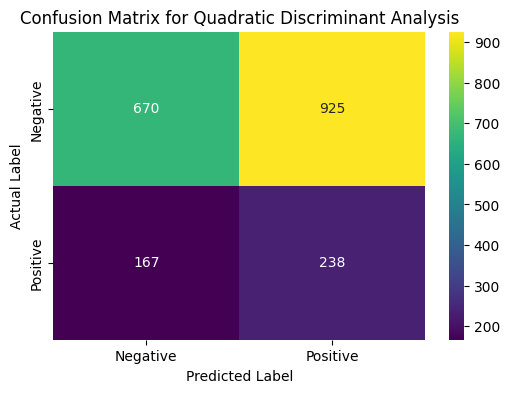

--------------------------------------------------------------------------------
Model: Gaussian Process Classifier
Accuracy: 0.2885
Classification Report:
              precision    recall  f1-score   support

          No       0.80      0.14      0.25      1595
         Yes       0.20      0.85      0.33       405

    accuracy                           0.29      2000
   macro avg       0.50      0.50      0.29      2000
weighted avg       0.68      0.29      0.26      2000



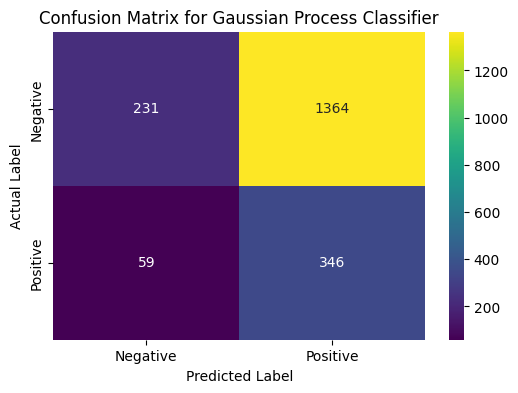

--------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: Multi-layer Perceptron
Accuracy: 0.682
Classification Report:
              precision    recall  f1-score   support

          No       0.80      0.81      0.80      1595
         Yes       0.20      0.20      0.20       405

    accuracy                           0.68      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.68      0.68      0.68      2000



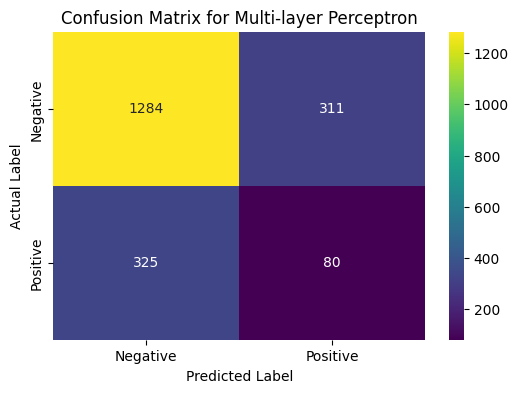

--------------------------------------------------------------------------------


In [81]:
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the data
df = pd.read_csv("/content/large_dataset_Diagnosis.csv")

# Define features and target
X = df.drop(['ID', 'Pregnancy loss'], axis=1)
y = df['Pregnancy loss']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifying categorical and numerical columns
numeric_cols = ['Age', 'BMI', 'Systolic blood Pressure', 'Diastolic blood pressure', 'Gestational age (weeks)']
categorical_cols = ['Residence', 'Education Status', 'Occupation', 'Socioeconomic status', 'Dressing style',
                    'Sunlight exposure', 'Dairy productis consumption', 'Multivitamin use', 'Season', 'Parity',
                    'History of Pregnancy Loss', 'Underlying Health Conditions', 'Physical Activity Level',
                    'Dietary Habits', 'Family History of Pregnancy Complications', 'Stress Level', 'Sleep Patterns',
                    'Exposure to Environmental Toxins', 'Vitamin D status (ng/mL)']  # Ensure all categorical features are listed

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(), categorical_cols)
])

# SMOTE
smote = SMOTE(random_state=42)

# Models to train and evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "Histogram-based Gradient Boosting": HistGradientBoostingClassifier(),
    "Voting Classifier": VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                                                       ('rf', RandomForestClassifier(n_estimators=100)),
                                                       ('svm', SVC()),
                                                       ('nb', GaussianNB()),
                                                       ('knn', KNeighborsClassifier())]),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "Gaussian Process Classifier": GaussianProcessClassifier(),
    "Multi-layer Perceptron": MLPClassifier()
}

# Loop through models, train and evaluate each
for name, model_instance in models.items():
    # Create pipeline with SMOTE and model
    pipeline = IMBPipeline(steps=[('preprocessor', preprocessor),
                                  ('smote', smote),
                                  ('model', model_instance)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Evaluate the model
    y_pred = pipeline.predict(X_test)

    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

    print("-" * 80)

In [82]:
pip install scikit-learn


# Validation

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier



# Load a dataset (example uses Iris dataset)
X, y = load_iris(return_X_y=True)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "Histogram-based Gradient Boosting": HistGradientBoostingClassifier(),
    "Voting Classifier": VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                                                       ('rf', RandomForestClassifier(n_estimators=100)),
                                                       ('svm', SVC()),
                                                       ('nb', GaussianNB()),
                                                       ('knn', KNeighborsClassifier())]),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "Gaussian Process Classifier": GaussianProcessClassifier(),
    "Multi-layer Perceptron": MLPClassifier()
}

# Number of folds for cross-validation
n_folds = 5

# Perform cross-validation and print results
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=n_folds, scoring='accuracy')
    print(f"{name}: Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")


Logistic Regression: Accuracy: 0.97 (+/- 0.05)
Random Forest: Accuracy: 0.96 (+/- 0.05)
Support Vector Machine: Accuracy: 0.97 (+/- 0.04)
Naive Bayes: Accuracy: 0.95 (+/- 0.05)
K-Nearest Neighbors: Accuracy: 0.97 (+/- 0.05)
Decision Tree: Accuracy: 0.96 (+/- 0.07)
AdaBoost: Accuracy: 0.95 (+/- 0.07)
Gradient Boosting: Accuracy: 0.96 (+/- 0.07)
Extra Trees: Accuracy: 0.95 (+/- 0.07)
Bagging Classifier: Accuracy: 0.95 (+/- 0.08)
Histogram-based Gradient Boosting: Accuracy: 0.95 (+/- 0.12)
Voting Classifier: Accuracy: 0.97 (+/- 0.04)
Linear Discriminant Analysis: Accuracy: 0.98 (+/- 0.05)
Quadratic Discriminant Analysis: Accuracy: 0.98 (+/- 0.05)
Gaussian Process Classifier: Accuracy: 0.97 (+/- 0.03)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multi-layer Perceptron: Accuracy: 0.98 (+/- 0.05)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [86]:
# Import necessary libraries
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the data
df = pd.read_csv("/content/large_dataset_Diagnosis.csv")

# Define features and target
X = df.drop(['ID', 'Pregnancy loss'], axis=1)
y = df['Pregnancy loss']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifying categorical and numerical columns
numeric_cols = ['Age', 'BMI', 'Systolic blood Pressure', 'Diastolic blood pressure', 'Gestational age (weeks)']
categorical_cols = ['Residence', 'Education Status', 'Occupation', 'Socioeconomic status', 'Dressing style',
                    'Sunlight exposure', 'Dairy productis consumption', 'Multivitamin use', 'Season', 'Parity',
                    'History of Pregnancy Loss', 'Underlying Health Conditions', 'Physical Activity Level',
                    'Dietary Habits', 'Family History of Pregnancy Complications', 'Stress Level', 'Sleep Patterns',
                    'Exposure to Environmental Toxins', 'Vitamin D status (ng/mL)']

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(), categorical_cols)
])

# SMOTE
smote = SMOTE(random_state=42)

# Models to train and evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "Histogram-based Gradient Boosting": HistGradientBoostingClassifier(),
    "Voting Classifier": VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                                                       ('rf', RandomForestClassifier(n_estimators=100)),
                                                       ('svm', SVC()),
                                                       ('nb', GaussianNB()),
                                                       ('knn', KNeighborsClassifier())]),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "Gaussian Process Classifier": GaussianProcessClassifier(),
    "Multi-layer Perceptron": MLPClassifier()
}

# Loop through models, train and evaluate each
for name, model_instance in models.items():
    # Create pipeline with SMOTE and model
    pipeline = IMBPipeline(steps=[('preprocessor', preprocessor),
                                  ('smote', smote),
                                  ('model', model_instance)])

    # Define hyperparameters for grid search
    param_grid = {}
    if name == "Random Forest":  # Example: hyperparameters specific to Random Forest
        param_grid = {
            'model__max_depth': [None, 10, 20],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4],
            'model__bootstrap': [True, False]
        }
    # Add similar blocks for other models as needed

    # Grid search for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model from grid search
    best_model = grid_search.best_estimator_

    # Train the best model
    best_model.fit(X_train, y_train)

    # Evaluate the best model
    y_pred = best_model.predict(X_test)

    print(f"Model: {name}")
    print("Best Parameters:", grid_search.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 80)


Model: Logistic Regression
Best Parameters: {}
Accuracy: 0.5315
Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.53      0.64      1595
         Yes       0.22      0.53      0.31       405

    accuracy                           0.53      2000
   macro avg       0.52      0.53      0.48      2000
weighted avg       0.70      0.53      0.58      2000

--------------------------------------------------------------------------------
Model: Random Forest
Best Parameters: {'model__bootstrap': True, 'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 10}
Accuracy: 0.7975
Classification Report:
              precision    recall  f1-score   support

          No       0.80      1.00      0.89      1595
         Yes       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

Model: Quadratic Discriminant Analysis
Best Parameters: {}
Accuracy: 0.454
Classification Report:
              precision    recall  f1-score   support

          No       0.80      0.42      0.55      1595
         Yes       0.20      0.59      0.30       405

    accuracy                           0.45      2000
   macro avg       0.50      0.50      0.43      2000
weighted avg       0.68      0.45      0.50      2000

--------------------------------------------------------------------------------
Model: Gaussian Process Classifier
Best Parameters: {}
Accuracy: 0.2885
Classification Report:
              precision    recall  f1-score   support

          No       0.80      0.14      0.25      1595
         Yes       0.20      0.85      0.33       405

    accuracy                           0.29      2000
   macro avg       0.50      0.50      0.29      2000
weighted avg       0.68      0.29      0.26      2000

------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Model: Multi-layer Perceptron
Best Parameters: {}
Accuracy: 0.6885
Classification Report:
              precision    recall  f1-score   support

          No       0.80      0.81      0.81      1595
         Yes       0.21      0.20      0.20       405

    accuracy                           0.69      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.68      0.69      0.68      2000

--------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
